In [218]:
import mne

In [219]:
import pandas as pd

In [220]:
import json

In [221]:
# %matplotlib inline
import matplotlib.pyplot as plt

In [222]:
import numpy as np

In [223]:
import matplotlib

In [224]:
%load_ext autoreload

%autoreload 2
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
import datetime as dt

In [226]:
import eeg_events

# Чтение сигнала и событий

In [248]:
ch_names = ["Fp1", "Fp2", "C3", "C4", "P7", "P8", 'O1', 'O2']

In [249]:
sampling_freq = 256
n_channels = len(ch_names)
ch_types = ["eeg"] * n_channels

In [250]:
events_name = f"./valid-data/subject-sasha/events/casino-bci-sasha-6.json"

In [251]:
baseline_name = f"./valid-data/subject-sasha/eeg/sasha6.txt"

In [252]:
events_df = tools.read_events_df(events_name, lambda x: True)

In [253]:
baseline_raw = tools.read_signal(
    baseline_name, 
    ch_names=ch_names, 
    ch_types=ch_types, 
    sampling_freq=sampling_freq
)

/home/anatoli/Документы/neurotech-cup/eeg-playground/tools.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  name,


Creating RawArray with float64 data, n_channels=8, n_times=108904
    Range : 0 ... 108903 =      0.000 ...   425.402 secs
Ready.
Setting up band-stop filter from 48 - 52 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 47.75 Hz)
- Upper passband edge: 52.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 52.25 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lo

# Фильтрация

In [254]:
transformed_raw = baseline_raw

# Сохранение

In [255]:
raw_alpha = tools.get_alpha_amplitude(transformed_raw, sampling_freq=sampling_freq, channels=["Fp1"])#.crop(tmin=time_stats[0], tmax=time_stats[1])

Number of frequencies: 129
Number of time steps: 6807
Creating RawArray with float64 data, n_channels=1, n_times=6807
    Range : 0 ... 6806 =      0.000 ...   425.375 secs
Ready.


In [256]:
# raw_alpha.get_data()

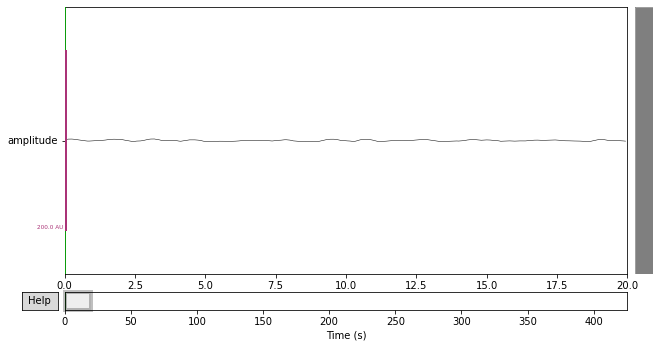

In [257]:
_ = mne.viz.plot_raw(
    raw_alpha,
    duration=20, 
    start=0, 
    scalings={
        "misc": 100
    },
    show=True
)

In [258]:
eeg_events.save_events(baseline_raw, raw_alpha, events_df, 'test-filtered')

Overwriting existing file.
Writing /home/anatoli/Документы/neurotech-cup/eeg-playground/valid-data/processed/test-filtered-unprocessed.raw.fif
Closing /home/anatoli/Документы/neurotech-cup/eeg-playground/valid-data/processed/test-filtered-unprocessed.raw.fif [done]
Overwriting existing file.
Writing /home/anatoli/Документы/neurotech-cup/eeg-playground/valid-data/processed/test-filtered.raw.fif
Closing /home/anatoli/Документы/neurotech-cup/eeg-playground/valid-data/processed/test-filtered.raw.fif [done]
